In [6]:
import multiprocessing

import numpy as np

import cnn
import utils
import hmm

In [7]:
cpus = multiprocessing.cpu_count() // 2
print(f'CPUs: {cpus}')

CPUs: 4


In [8]:
x = 2
y = np.array(['a', 'b', 'c'])
s = np.array([1.0, 0.0])

real_hmm_train = hmm.HMM(
    x=x,
    y=y,
    a=np.array([
        [0.3, 0.7],
        [0.1, 0.9]
    ]),
    b=np.array([
        [0.6, 0.4, 0.0],
        [0.0, 0.0, 1.0]
    ]),
    s=s
)

real_hmm_val = hmm.HMM(
    x=x,
    y=y,
    a=np.array([
        [0.5, 0.5],
        [0.2, 0.8]
    ]),
    b=np.array([
        [0.1, 0.7, 0.2],
        [0.8, 0.0, 0.2]
    ]),
    s=s
)

real_hmm_rand = hmm.random_hmm(
    x=x,
    y=''.join(y),
    s=s
)

In [9]:
epoch_size = 100
batch_size = 100
seq_len = 20

train_data_gen = utils.HMMDataGenerator(
    real_hmm_train,
    epoch_size,
    batch_size,
    seq_len
)

val_data_gen = utils.HMMDataGenerator(
    real_hmm_val,
    epoch_size,
    batch_size,
    seq_len
)

rand_data_gen = utils.HMMDataGenerator(
    real_hmm_rand,
    epoch_size,
    batch_size,
    seq_len
)

In [10]:
t_hmm = real_hmm_rand
t_gen = rand_data_gen
v_hmm = real_hmm_val
v_gen = val_data_gen

## CNN 1

In [6]:
model = cnn.CNNModel(t_gen.input_shape())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18, 4)             40        
_________________________________________________________________
activation_1 (Activation)    (None, 18, 4)             0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                

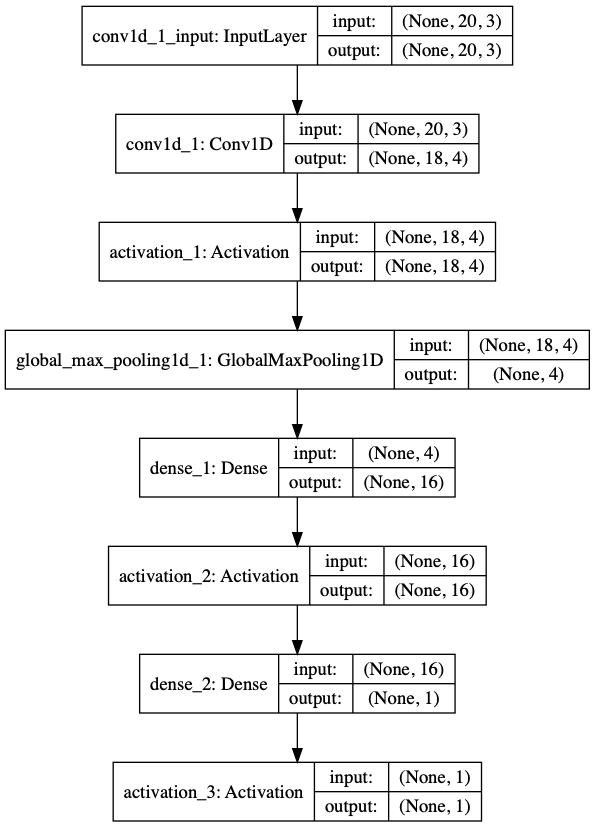

In [7]:
utils.plot_model(model, 'images/cnn1.png')

In [9]:
epochs = 20

history = model.fit_generator(
    generator=t_gen,
    epochs=epochs,
#     validation_data=v_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 6s 57ms/step - loss: 0.4431 - accuracy: 0.8357 - val_loss: 0.8358 - val_accuracy: 0.5337
Epoch 2/20
100/100 [==============================] - 6s 57ms/step - loss: 0.3354 - accuracy: 0.8590 - val_loss: 0.9860 - val_accuracy: 0.5552
Epoch 3/20
100/100 [==============================] - 6s 59ms/step - loss: 0.3075 - accuracy: 0.8713 - val_loss: 1.0676 - val_accuracy: 0.5528
Epoch 4/20
100/100 [==============================] - 6s 61ms/step - loss: 0.2944 - accuracy: 0.8806 - val_loss: 1.1172 - val_accuracy: 0.5328
Epoch 5/20
100/100 [==============================] - 6s 63ms/step - loss: 0.2913 - accuracy: 0.8841 - val_loss: 1.1547 - val_accuracy: 0.5248
Epoch 6/20
100/100 [==============================] - 6s 63ms/step - loss: 0.2875 - accuracy: 0.8860 - val_loss: 1.3562 - val_accuracy: 0.5290
Epoch 7/20
100/100 [==============================] - 6s 63ms/step - loss: 0.2807 - accuracy: 0.8888 - val_loss: 1.1812 - val_accuracy: 0.5440

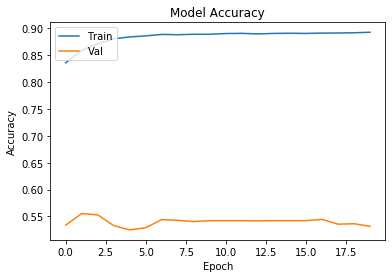

In [10]:
utils.plot_acc(history)

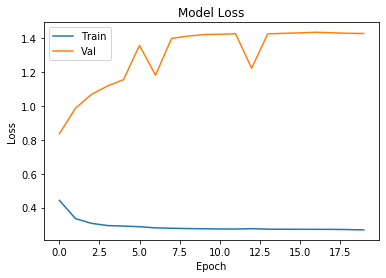

In [11]:
utils.plot_loss(history)

In [13]:
test_X = t_hmm.simulate(seq_len, reset_before=True)[1]
print(test_X)
test_X = np.array([t_gen._encode_hmm_outputs(test_X)])
print(test_X)

['b' 'c' 'a' 'b' 'b' 'b' 'a' 'c' 'a' 'c' 'a' 'c' 'c' 'c' 'b' 'b' 'b' 'b'
 'c' 'a']
[[[0. 1. 0.]
  [0. 0. 1.]
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [1. 0. 0.]
  [0. 0. 1.]
  [1. 0. 0.]
  [0. 0. 1.]
  [1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 0. 1.]
  [1. 0. 0.]]]


In [12]:
p = model.predict(test_X)
print(p)

[[0.9931558]]


In [13]:
pred_real = bool(round(p[0][0]))
print(f'Predict real?: {pred_real}')

Predict real?: True


In [14]:
model2 = cnn.CNNModel2(t_gen.input_shape())
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18, 4)             40        
_________________________________________________________________
activation_1 (Activation)    (None, 18, 4)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 4)              0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 7, 8)              104       
_________________________________________________________________
activation_2 (Activation)    (None, 7, 8)              0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)               

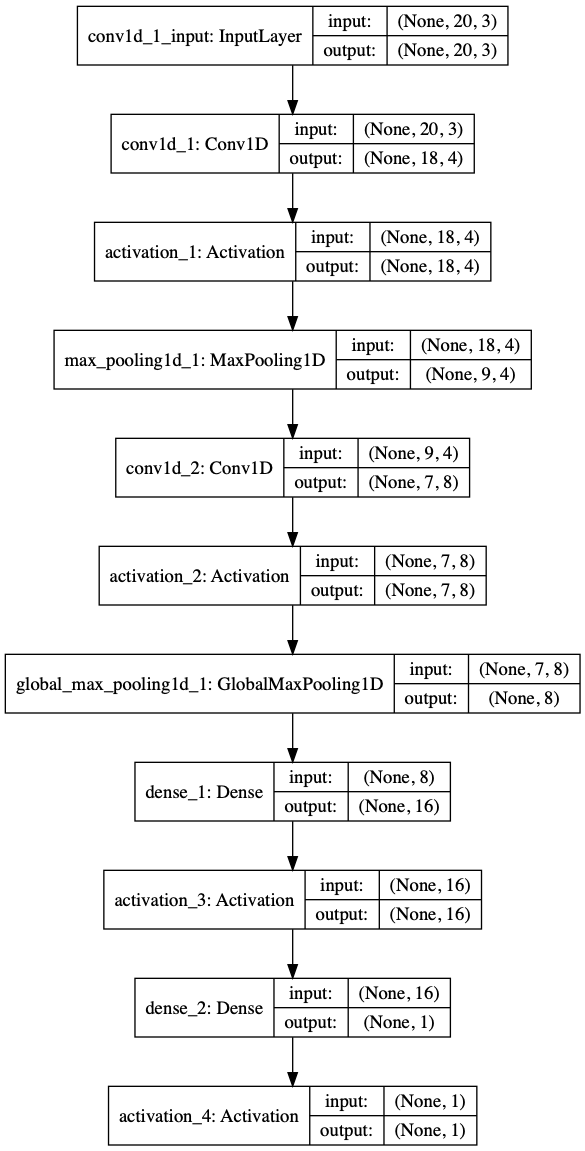

In [15]:
utils.plot_model(model2, to_file='images/cnn2.png')

In [ ]:
epochs = 20

history2 = model2.fit_generator(
    generator=t_gen,
    epochs=epochs,
#     validation_data=v_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 7s 70ms/step - loss: 0.5632 - accuracy: 0.7684 - val_loss: 0.8353 - val_accuracy: 0.4168
Epoch 2/20
100/100 [==============================] - 7s 71ms/step - loss: 0.2237 - accuracy: 0.9489 - val_loss: 1.5928 - val_accuracy: 0.4520
Epoch 3/20
100/100 [==============================] - 7s 66ms/step - loss: 0.1242 - accuracy: 0.9609 - val_loss: 2.2873 - val_accuracy: 0.4622
Epoch 4/20
100/100 [==============================] - 7s 71ms/step - loss: 0.1065 - accuracy: 0.9655 - val_loss: 2.5378 - val_accuracy: 0.4651
Epoch 5/20
100/100 [==============================] - 13s 132ms/step - loss: 0.1012 - accuracy: 0.9660 - val_loss: 2.5577 - val_accuracy: 0.4612
Epoch 6/20


/Users/sam/anaconda3/envs/fyp/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


  1/100 [..............................] - ETA: 49:45 - loss: 0.1509 - accuracy: 0.9500

/Users/sam/anaconda3/envs/fyp/lib/python3.7/site-packages/keras/utils/data_utils.py:616: UserWarning: The input 40 could not be retrieved. It could be because a worker has died.
  UserWarning)


  2/100 [..............................] - ETA: 49:15 - loss: 0.0807 - accuracy: 0.9750

In [ ]:
utils.plot_acc(history2)

In [ ]:
utils.plot_loss(history2)

# Model 3

In [16]:
model3 = cnn.CNNModel3(t_gen.input_shape())
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 18, 32)            320       
_________________________________________________________________
activation_5 (Activation)    (None, 18, 32)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7, 64)             6208      
_________________________________________________________________
activation_6 (Activation)    (None, 7, 64)             0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

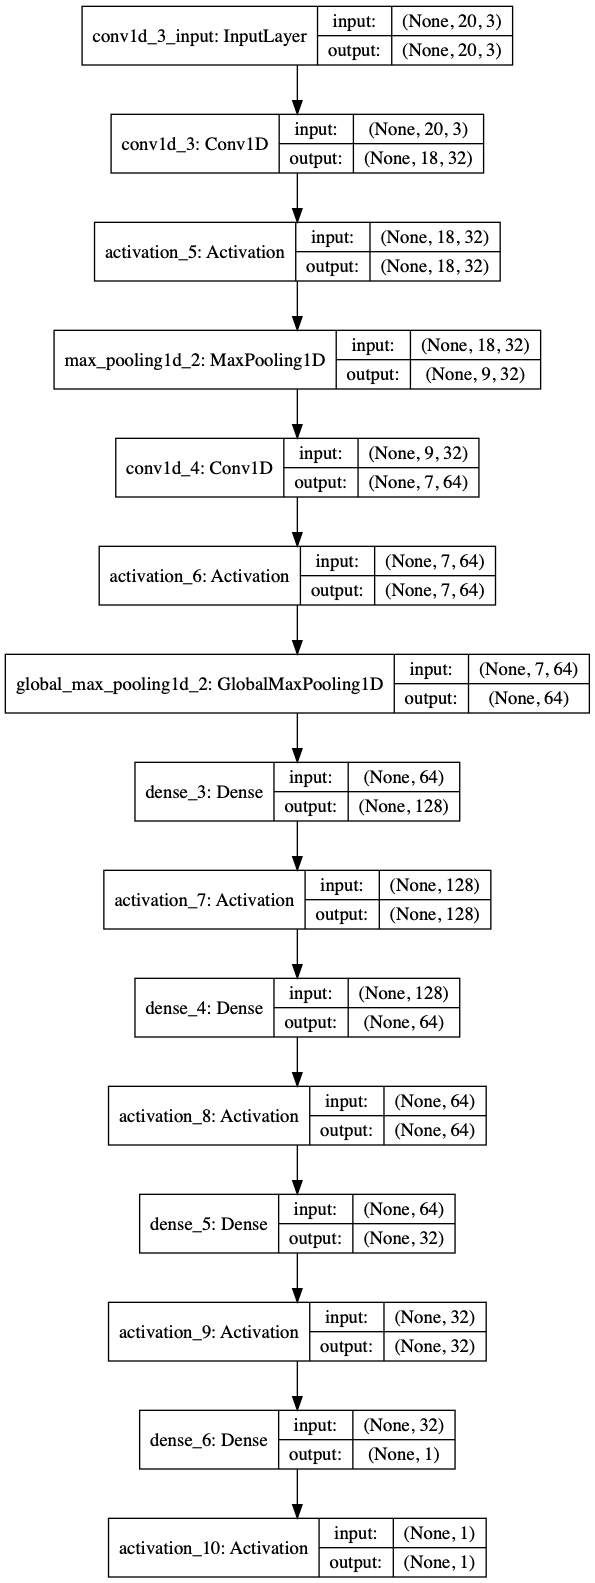

In [17]:
utils.plot_model(model3, 'images/cnn3.png')

In [18]:
epochs = 20

history3 = model3.fit_generator(
    generator=t_gen,
    epochs=epochs,
#     validation_data=v_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 6s 58ms/step - loss: 0.6553 - accuracy: 0.6299 - val_loss: 0.6706 - val_accuracy: 0.6152
Epoch 2/20
100/100 [==============================] - 6s 56ms/step - loss: 0.5271 - accuracy: 0.7440 - val_loss: 0.7407 - val_accuracy: 0.5313
Epoch 3/20
100/100 [==============================] - 6s 60ms/step - loss: 0.4668 - accuracy: 0.7777 - val_loss: 0.8664 - val_accuracy: 0.5442
Epoch 4/20
100/100 [==============================] - 6s 61ms/step - loss: 0.4456 - accuracy: 0.7926 - val_loss: 1.0625 - val_accuracy: 0.5344
Epoch 5/20
100/100 [==============================] - 6s 63ms/step - loss: 0.4256 - accuracy: 0.8018 - val_loss: 1.3512 - val_accuracy: 0.5262
Epoch 6/20
100/100 [==============================] - 7s 66ms/step - loss: 0.4129 - accuracy: 0.8124 - val_loss: 1.7327 - val_accuracy: 0.5113
Epoch 7/20
100/100 [==============================] - 6s 64ms/step - loss: 0.4011 - accuracy: 0.8164 - val_loss: 1.8131 - val_accuracy: 0.5100

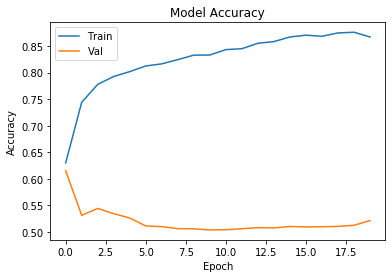

In [19]:
utils.plot_acc(history3)

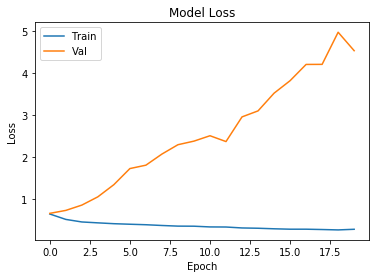

In [20]:
utils.plot_loss(history3)